# Requests: API Calls

Use the `requests` library to make API calls, and `json` to parse the result.

As an example, I'm using this dataset <https://data.london.gov.uk/dataset/fly-tipping-incidents> which is the number of recorded fly-tipping (illegal dumping of waste or rubbish) incidents by action and prosecutions taken.

In [3]:
import requests
import json
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
r = requests.get('https://data.london.gov.uk/api/table/zdgkb_k62g2?$limit=5000')

Note that I added the `$limit=5000` tag at the end since according to the API, the maximum number of results that can be returned in 1 request is 5000. This dataset contains 231 rows -- so we just max it out to get all of them.

If we don't do it this way, then need to navigate through the pages:

In [5]:
r_pages = requests.get('https://data.london.gov.uk/api/table/zdgkb_k62g2')
r_pages_dict = json.loads(r_pages.text)
r_pages_dict['info']

{'total': 231,
 'rows': 100,
 'offset': 0,
 'limit': 100,
 'page': 1,
 'pages': 3,
 'nextPage': 'https://data.london.gov.uk/api/table/zdgkb_k62g2?$offset=100',
 'lastPage': 'https://data.london.gov.uk/api/table/zdgkb_k62g2?$offset=200',
 'sql': 'SELECT\n  *\nFROM dataset;',
 'title': 'Fly Tipping Borough (Machine Readable)'}

Use `json.loads` to convert the json text into a dictionary, which we will then convert into a pandas dataframe:

In [6]:
result_dict = json.loads(r.text)

In [7]:
result_dict.keys()

dict_keys(['info', 'fields', 'rows'])

In [8]:
result_dict['info']

{'total': 231,
 'rows': 231,
 'offset': 0,
 'limit': 5000,
 'page': 1,
 'pages': 1,
 'sql': 'SELECT\n  *\nFROM dataset\nLIMIT 5000;',
 'title': 'Fly Tipping Borough (Machine Readable)'}

In [9]:
result_dict['fields']

[{'id': '_row_id', 'datatype': 'integer', 'title': 'Row #'},
 {'id': 'code', 'datatype': 'text', 'title': 'code'},
 {'id': 'area', 'datatype': 'text', 'title': 'area'},
 {'id': 'year', 'datatype': 'text', 'title': 'year'},
 {'id': 'total_incidents', 'datatype': 'text', 'title': 'total_incidents'},
 {'id': 'total_action_taken',
  'datatype': 'text',
  'title': 'total_action_taken'},
 {'id': 'warning_letters', 'datatype': 'integer', 'title': 'warning_letters'},
 {'id': 'fixed_penalty_notices',
  'datatype': 'integer',
  'title': 'fixed_penalty_notices'},
 {'id': 'statutory_notices',
  'datatype': 'integer',
  'title': 'statutory_notices'},
 {'id': 'formal_cautions', 'datatype': 'integer', 'title': 'formal_cautions'},
 {'id': 'injunctions', 'datatype': 'integer', 'title': 'injunctions'},
 {'id': 'prosecutions', 'datatype': 'integer', 'title': 'prosecutions'}]

In [10]:
result_dict['rows'][:3]

[{'_row_id': 1,
  'code': 'E09000001',
  'area': 'City of London',
  'year': '2011-12',
  'total_incidents': '527',
  'total_action_taken': '563',
  'warning_letters': 149,
  'fixed_penalty_notices': 182,
  'statutory_notices': 3,
  'formal_cautions': 0,
  'injunctions': 0,
  'prosecutions': 0},
 {'_row_id': 2,
  'code': 'E09000002',
  'area': 'Barking and Dagenham',
  'year': '2011-12',
  'total_incidents': '3,665',
  'total_action_taken': '2,687',
  'warning_letters': 140,
  'fixed_penalty_notices': 78,
  'statutory_notices': 110,
  'formal_cautions': 0,
  'injunctions': 0,
  'prosecutions': 0},
 {'_row_id': 3,
  'code': 'E09000003',
  'area': 'Barnet',
  'year': '2011-12',
  'total_incidents': '1,450',
  'total_action_taken': '2,356',
  'warning_letters': 337,
  'fixed_penalty_notices': 46,
  'statutory_notices': 0,
  'formal_cautions': 0,
  'injunctions': 0,
  'prosecutions': 0}]

Can convert the json output to a pandas dataframe:

In [11]:
df = pd.DataFrame(result_dict['rows'])

In [12]:
df

,_row_id,code,area,year,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
0,1,E09000001,City of London,2011-12,527,563,149.0,182.0,3.0,0.0,0.0,0.0
1,2,E09000002,Barking and Dagenham,2011-12,"3,665","2,687",140.0,78.0,110.0,0.0,0.0,0.0
2,3,E09000003,Barnet,2011-12,"1,450","2,356",337.0,46.0,0.0,0.0,0.0,0.0
3,4,E09000004,Bexley Council,2011-12,980,505,0.0,36.0,0.0,0.0,0.0,19.0
4,5,E09000005,Brent,2011-12,"7,272","6,713",679.0,558.0,1100.0,28.0,0.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...
226,227,E09000029,Sutton,2017-18,"2,683",450,57.0,6.0,56.0,0.0,0.0,0.0
227,228,E09000030,Tower Hamlets,2017-18,"7,465","13,316",821.0,1179.0,161.0,0.0,0.0,0.0
228,229,E09000031,Waltham Forest,2017-18,"7,678","17,036",236.0,9566.0,1005.0,202.0,0.0,45.0
229,230,E09000032,Wandsworth,2017-18,"5,000","9,735",1453.0,2064.0,0.0,158.0,0.0,0.0


In [13]:
df.dtypes

_row_id                    int64
code                      object
area                      object
year                      object
total_incidents           object
total_action_taken        object
warning_letters          float64
fixed_penalty_notices    float64
statutory_notices        float64
formal_cautions          float64
injunctions              float64
prosecutions             float64
dtype: object

For some reason, `total_incidents` and `total_action_taken` columns are strings, but they're numeric. Need to convert!

In [14]:
df['total_incidents'].sample(10)

106    18,560
200     6,153
96      4,723
103    12,912
220     3,562
145    34,975
172    24,797
31      1,561
164         0
132       627
Name: total_incidents, dtype: object

In [15]:
df['total_incidents'] = df['total_incidents'].str.replace(',','')
df['total_incidents'] = pd.to_numeric(df.total_incidents, errors='coerce')
df['total_action_taken'] = df['total_action_taken'].str.replace(',','')
df['total_action_taken'] = pd.to_numeric(df.total_action_taken, errors='coerce')

In [16]:
df.groupby('code').sum()

,_row_id,total_incidents,total_action_taken,warning_letters,fixed_penalty_notices,statutory_notices,formal_cautions,injunctions,prosecutions
code,,,,,,,,,
E09000001,700,6059.0,7945,849.0,1263.0,563.0,3.0,0.0,1.0
E09000002,707,17340.0,14176,2314.0,2531.0,1494.0,0.0,0.0,16.0
E09000003,714,35722.0,6541,900.0,705.0,108.0,0.0,0.0,5.0
E09000004,721,8953.0,3291,416.0,280.0,0.0,0.0,0.0,27.0
E09000005,728,83243.0,31889,2756.0,4605.0,3843.0,101.0,1.0,332.0
E09000006,735,20559.0,2712,154.0,182.0,85.0,3.0,0.0,34.0
E09000007,742,63630.0,46667,488.0,2416.0,1939.0,1.0,0.0,0.0
E09000008,749,91558.0,6339,299.0,1908.0,191.0,1.0,0.0,192.0
E09000009,756,59250.0,48696,19679.0,16513.0,852.0,35.0,1.0,74.0


As an exercise, I want to map the total incidents for each postcode region. 

I'll need the boundaries for each postcode region, which I can obtain through API requests from <https://findthatpostcode.uk/#api>.

First, construct the API request of the form: 

`https://findthatpostcode.uk/areas/` + `postcode, e.g. E14000639` + `.geojson`

In [17]:
geojson_test = requests.get('https://findthatpostcode.uk/areas/E09000001.geojson')

In [18]:
geojson_test.json()

{'features': [{'geometry': {'coordinates': [[[[-0.0967586335164,
        51.5233140396699],
       [-0.096415369872962, 51.5228316719216],
       [-0.095090210520414, 51.5231090786548],
       [-0.094318568083321, 51.521484893874],
       [-0.092498378174381, 51.5214729038188],
       [-0.092360246779547, 51.5210356121512],
       [-0.089673327954981, 51.5207189769826],
       [-0.089983067442775, 51.5199733252714],
       [-0.086199731342019, 51.5188121095501],
       [-0.085232645096576, 51.5203483971845],
       [-0.083123309892571, 51.5198516137617],
       [-0.081773135901755, 51.5207454022021],
       [-0.081040817353568, 51.5219730581335],
       [-0.078529105704302, 51.5215119188801],
       [-0.07941295295195, 51.5188853309855],
       [-0.078099054011485, 51.5189786225766],
       [-0.078173494433389, 51.5184712049869],
       [-0.076872042152347, 51.5166250772225],
       [-0.074003284602797, 51.514478466161],
       [-0.073052076952636, 51.511808326193],
       [-0.07281267

In [19]:
gpd.GeoDataFrame.from_features(geojson_test.json()['features'])

,geometry,active,areachect,areaehect,areaihect,arealhect,child_count,child_counts,code,date_end,...,has_boundary,name,name_welsh,owner,parent,predecessor,sort_order,statutory_instrument_id,statutory_instrument_title,successor
0,"MULTIPOLYGON (((-0.09676 51.52331, -0.09642 51...",True,289.24,314.96,0.0,289.24,52,"{'msoa11': 1, 'ncp': 1, 'ward': 50}",E09000001,None,...,True,City of London,None,MHCLG,E12000007,[00AA],E09000001,1111/1001,GSS re-coding strategy,[]


Ok, now create a dataframe for all the postcodes in the flytipping dataset.

In [20]:
postcodes = df.code.unique()
postcode_boundaries = gpd.GeoDataFrame()

for i in range(0, len(postcodes)):
    postcode = postcodes[i]
    api_call = f'https://findthatpostcode.uk/areas/{postcode}.geojson'
    print(f'REQ {i+1}/{len(postcodes)}: {postcode} from {api_call}')
    postcode_result = requests.get(api_call)
    postcode_boundaries = postcode_boundaries.append(gpd.GeoDataFrame.from_features(postcode_result.json()['features']), ignore_index=True)

REQ 1/33: E09000001 from https://findthatpostcode.uk/areas/E09000001.geojson
REQ 2/33: E09000002 from https://findthatpostcode.uk/areas/E09000002.geojson
REQ 3/33: E09000003 from https://findthatpostcode.uk/areas/E09000003.geojson
REQ 4/33: E09000004 from https://findthatpostcode.uk/areas/E09000004.geojson
REQ 5/33: E09000005 from https://findthatpostcode.uk/areas/E09000005.geojson
REQ 6/33: E09000006 from https://findthatpostcode.uk/areas/E09000006.geojson
REQ 7/33: E09000007 from https://findthatpostcode.uk/areas/E09000007.geojson
REQ 8/33: E09000008 from https://findthatpostcode.uk/areas/E09000008.geojson
REQ 9/33: E09000009 from https://findthatpostcode.uk/areas/E09000009.geojson
REQ 10/33: E09000010 from https://findthatpostcode.uk/areas/E09000010.geojson
REQ 11/33: E09000011 from https://findthatpostcode.uk/areas/E09000011.geojson
REQ 12/33: E09000012 from https://findthatpostcode.uk/areas/E09000012.geojson
REQ 13/33: E09000013 from https://findthatpostcode.uk/areas/E09000013.geo

In [21]:
postcode_boundaries = postcode_boundaries[['code', 'geometry']]
postcode_boundaries = postcode_boundaries.reset_index()

In [22]:
df_2 = df.groupby('code').sum().reset_index()

<AxesSubplot:>

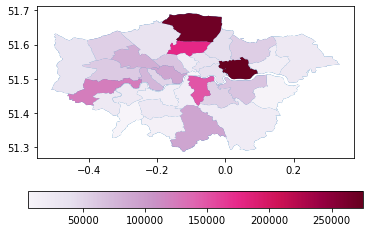

In [23]:
df_with_geo = postcode_boundaries.merge(df_2, on='code')

fig, ax = plt.subplots()
df_with_geo.plot(ax=ax)
df_with_geo.plot('total_incidents', 
                 ax=ax, 
                 cmap='PuRd', 
                 legend=True, 
                 legend_kwds={'orientation': 'horizontal'})

## Mapping with Kepler:

In [24]:
from keplergl import KeplerGl

In [25]:
map_flytipping = KeplerGl(height=600, width=800)
# Add data to Kepler
map_flytipping.add_data(data=df_with_geo, name="total_incidents")
map_flytipping

User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


KeplerGl(data={'total_incidents': {'index': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18,…